# 2.概率分布

In [2]:
# preparation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.rv import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    MultivariateGaussian,
    MultivariateGaussianMixture,
    StudentsT,
    Uniform
)

np.random.seed(1234)

本章学习各种特殊的概率分布。作用：在有限观测下，对p(x)进行建模-密度估计.每次取样都是独立同分布的。<p>
我们用离散随机变量的二项分布和多项式分布，连续随机变量的高斯分布的参数估计。
- 频率派计算似然函数之类的确定参数。
- 贝叶斯派引入参数的先验，来计算后验。<p>

还有个重要概念：共轭先验：后验概率和先验概率分布相同。<p>
也会介绍非参数密度估计的方法。

## 2.1 二元变量
x只能取0或1，取1的概率是$\mu$(扔损坏的硬币)

$$ p(x = 1|\mu) = \mu \tag{2.1} $$

$0 \leq \mu \leq 1 $，所以$ p(x=0|\mu) = 1 - \mu $。概率分布为：

$$ Bern(x|\mu) = \mu^x(1-\mu)^{1 - x} \tag{2.2} $$

这就是伯努利分布。

它归一化的，均值和方差也可以计算。

$E[x]=\mu \tag{2.3}$

$var[x]=\mu(1-\mu) \tag{2.4}$

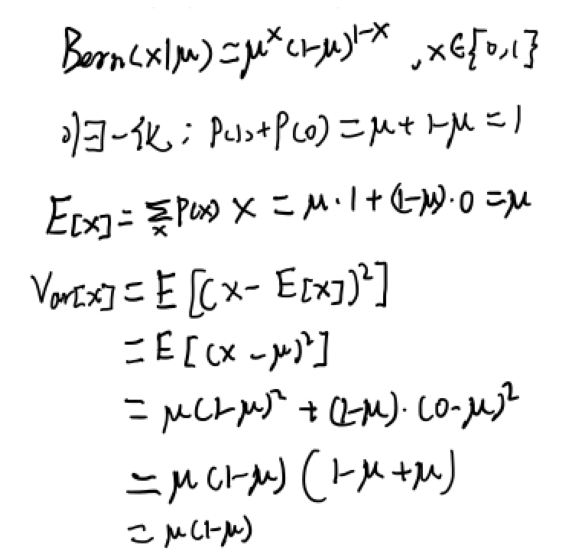

In [5]:
# bern归一化
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1bern归一化.png')
plt.axis('off')
ax.imshow(d)

如果观测值是数据集$D=\{x_1,...,x_N\}$，每次观测都是在$p(x|\mu)$中抽取。则似然函数有：

$$ p(D|\mu) = \prod\limits_{n=1}^Np(x_n|\mu) = \prod\limits_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_n} \tag{2.5} $$

频度派：最大化似然函数来估计参数》最大化对数似然。

$$ \ln p(D|\mu) = \sum\limits_{n=1}^N\ln p(x_n|\mu) = \sum\limits_{n=1}^N{x_n\ln \mu + (1 - x_n)\ln(1-\mu)} \tag{2.6} $$

**这个只用N次观测结果得到的似然函数，也叫充分统计量。**令其导数为零，我们有最大似然的估计值时的$\mu$:

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^N x_n \tag{2.7} $$

这也叫做样本均值。如果把x=1的观测次数记录为m，则2.7可以写成：

$$ \mu_{ML} = \frac{m}{N} \tag{2.8} $$

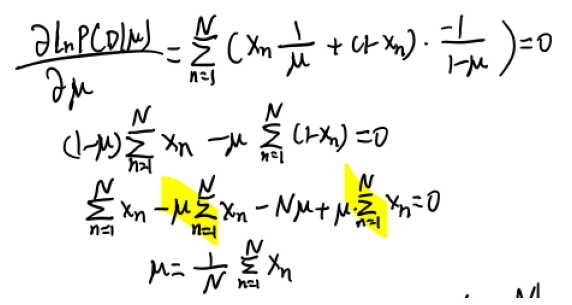

In [9]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1最大似然.png')
plt.axis('off')
ax.imshow(d)

但这个只用观测可能不靠谱，扔硬币三次刚好都是正面N=m=3,则会判断未来观测都是正面。

In [3]:
model = Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


In [4]:
model = Bernoulli()
model.fit(np.array([1., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=1.0
)


一般引入先验来解决。

换一个角度，在给定数据集规模N的条件下，x=1的观测出现数量m的概率分布：二项分布。

概率是正比于$ \mu^m(1 - \mu)^{N - m} $的.就是每次扔硬币的结果叠乘得到的。

而且需要归一化常数：N次抛掷中，m个正面向上的次数的组合$C_N^m$为归一化常数。

$$ Bin(m|N, \mu) = \binom{N}{m}\mu^m(1 - \mu)^{N - m} \tag{2.9} $$

其中 $$ \binom{N}{m} \equiv \frac{N!}{(N - m)!m!} \tag{2.10} $$

$ N = 10, \mu = 0.25 $二项式分布示意图:

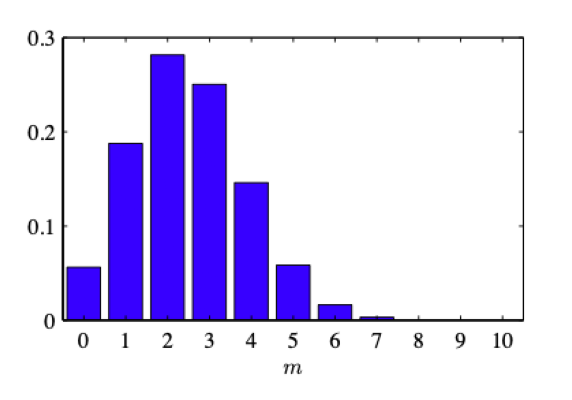

In [7]:
# 二项分布
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1二项分布.png')
plt.axis('off')
ax.imshow(d)

根据1.10:加和的均值是均值的加和，加和的方差是方差的加和:

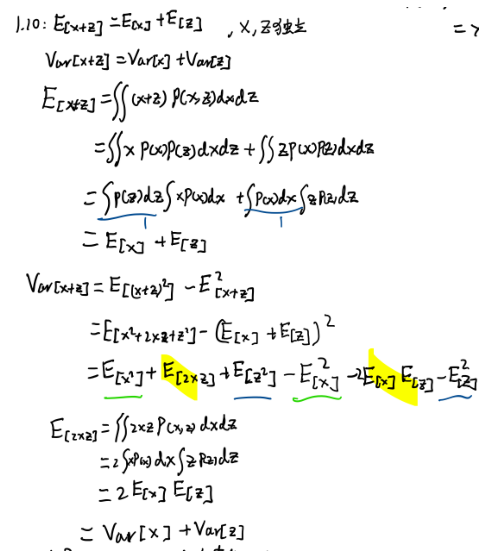

In [8]:
# 1.10
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.11.10.png')
plt.axis('off')
ax.imshow(d)

$m=x_1+...+x_N$，因此我们有:<p>

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} m \operatorname{Bin}(m \mid N, \mu)=N \mu \tag{2.11}
$$
    
$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} (m-E[m])^2 \operatorname{Bin}(m \mid N, \mu)=N \mu(1-\mu) \tag{2.12}
$$